*Milestone 1 Assignment: Drawing Class Diagram for Data Optimization*


**Part 1 : Explore all the classes that can be derived from this scenario Identify all attributes and methods for each class. Draw a class diagram**

In [15]:
from tabulate import tabulate

# Data for classes, attributes, and methods
data = [
    ["Customer",
     "customerID: int, name: string, email: string, password: string, address: string, phoneNumber: string, orderHistory: List<Order>",
     "register(): void, login(email: string, password: string): bool, logout(): void, searchBook(keyword: string): List<Book>, addToCart(Book, quantity: int): void, placeOrder(): Order, trackOrder(orderID: int): Order, updateProfile(newDetails: Customer): void"],

    ["Book",
     "bookID: int, title: string, author: string, genre: string, ISBN: string, price: float, stockQuantity: int, description: string, publisher: string",
     "getDetails(): string, checkAvailability(): bool, updateStock(newStock: int): void, applyDiscount(discount: float): void"],

    ["Cart",
     "cartID: int, customer: Customer, cartItems: List<CartItem>",
     "addItem(Book, quantity: int): void, removeItem(Book): void, calculateTotal(): float, clearCart(): void, checkout(): Order"],

    ["CartItem",
     "cartItemID: int, book: Book, quantity: int, price: float",
     "getItemTotal(): float, updateQuantity(newQuantity: int): void"],

    ["Order",
     "orderID: int, orderDate: date, customer: Customer, orderItems: List<OrderItem>, shippingMethod: string, totalAmount: float, orderStatus: string",
     "calculateTotal(): float, updateStatus(newStatus: string): void, trackOrder(): string, cancelOrder(): void"],

    ["OrderItem",
     "orderItemID: int, book: Book, quantity: int, price: float",
     "calculateItemTotal(): float"],

    ["Payment",
     "paymentID: int, paymentMethod: string, paymentStatus: string, amount: float",
     "processPayment(): bool, refundPayment(): bool"],

    ["Shipping",
     "shippingID: int, shippingMethod: string, shippingCost: float, shippingAddress: string, shippingStatus: string",
     "calculateShippingCost(): float, updateShippingStatus(newStatus: string): void"],

    ["StockManager",
     "managerID: int, name: string",
     "checkStock(book: Book): int, updateStock(book: Book, newQuantity: int): void, reorderBook(book: Book, quantity: int): void"],

    ["Review",
     "reviewID: int, customer: Customer, book: Book, rating: int, comment: string",
     "addReview(customer: Customer, book: Book, rating: int, comment: string): void, editReview(newRating: int, newComment: string): void"]
]

# Column headers
headers = ["Class", "Attributes", "Methods"]

# Display the table
print(tabulate(data, headers=headers, tablefmt="grid"))


+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Class        | Attributes                                                                                                                                        | Methods                                                                                                                                                                                                                                                        |
+==============+============================================================================================================================================

**2.	Class Diagram**

The class diagram would show relationships such as

- Customer has a Cart and can place multiple Orders.

- Order contains multiple OrderItems, each representing a Book.

- Order has a Payment and Shipping associated with it.

- Book is referenced in CartItem, OrderItem, and Review.

- StockManager manages the Book stock.


from typing import List
from datetime import date

# 1. Customer
class Customer:
    def __init__(self, customerID: int, name: str, email: str, password: str, address: str, phoneNumber: str, orderHistory: List['Order']):
        self.customerID = customerID
        self.name = name
        self.email = email
        self.password = password
        self.address = address
        self.phoneNumber = phoneNumber
        self.orderHistory = orderHistory

    def register(self):
        pass

    def login(self, email: str, password: str) -> bool:
        return self.email == email and self.password == password

    def logout(self):
        pass

    def searchBook(self, keyword: str) -> List['Book']:
        pass

    def addToCart(self, book: 'Book', quantity: int):
        pass

    def placeOrder(self) -> 'Order':
        pass

    def trackOrder(self, orderID: int) -> 'Order':
        pass

    def updateProfile(self, newDetails: 'Customer'):
        self.__dict__.update(newDetails.__dict__)

# 2. Book
class Book:
    def __init__(self, bookID: int, title: str, author: str, genre: str, ISBN: str, price: float, stockQuantity: int, description: str, publisher: str):
        self.bookID = bookID
        self.title = title
        self.author = author
        self.genre = genre
        self.ISBN = ISBN
        self.price = price
        self.stockQuantity = stockQuantity
        self.description = description
        self.publisher = publisher

    def getDetails(self) -> str:
        return f"{self.title} by {self.author}, {self.genre}, ISBN: {self.ISBN}"

    def checkAvailability(self) -> bool:
        return self.stockQuantity > 0

    def updateStock(self, newStock: int):
        self.stockQuantity = newStock

    def applyDiscount(self, discount: float):
        self.price -= self.price * (discount / 100)

# 3. Cart
class Cart:
    def __init__(self, cartID: int, customer: Customer, cartItems: List['CartItem']):
        self.cartID = cartID
        self.customer = customer
        self.cartItems = cartItems

    def addItem(self, book: Book, quantity: int):
        self.cartItems.append(CartItem(len(self.cartItems) + 1, book, quantity, book.price))

    def removeItem(self, book: Book):
        self.cartItems = [item for item in self.cartItems if item.book != book]

    def calculateTotal(self) -> float:
        return sum(item.getItemTotal() for item in self.cartItems)

    def clearCart(self):
        self.cartItems = []

    def checkout(self) -> 'Order':
        pass

# 4. CartItem
class CartItem:
    def __init__(self, cartItemID: int, book: Book, quantity: int, price: float):
        self.cartItemID = cartItemID
        self.book = book
        self.quantity = quantity
        self.price = price

    def getItemTotal(self) -> float:
        return self.quantity * self.price

    def updateQuantity(self, newQuantity: int):
        self.quantity = newQuantity

# 5. Order
class Order:
    def __init__(self, orderID: int, orderDate: date, customer: Customer, orderItems: List['OrderItem'], shippingMethod: str, totalAmount: float, orderStatus: str):
        self.orderID = orderID
        self.orderDate = orderDate
        self.customer = customer
        self.orderItems = orderItems
        self.shippingMethod = shippingMethod
        self.totalAmount = totalAmount
        self.orderStatus = orderStatus

    def calculateTotal(self) -> float:
        return sum(item.calculateItemTotal() for item in self.orderItems)

    def updateStatus(self, newStatus: str):
        self.orderStatus = newStatus

    def trackOrder(self) -> str:
        return self.orderStatus

    def cancelOrder(self):
        self.orderStatus = 'Cancelled'

# 6. OrderItem
class OrderItem:
    def __init__(self, orderItemID: int, book: Book, quantity: int, price: float):
        self.orderItemID = orderItemID
        self.book = book
        self.quantity = quantity
        self.price = price

    def calculateItemTotal(self) -> float:
        return self.quantity * self.price

# 7. Payment
class Payment:
    def __init__(self, paymentID: int, paymentMethod: str, paymentStatus: str, amount: float):
        self.paymentID = paymentID
        self.paymentMethod = paymentMethod
        self.paymentStatus = paymentStatus
        self.amount = amount

    def processPayment(self) -> bool:
        self.paymentStatus = 'Completed'
        return True

    def refundPayment(self) -> bool:
        self.paymentStatus = 'Refunded'
        return True

# 8. Shipping
class Shipping:
    def __init__(self, shippingID: int, shippingMethod: str, shippingCost: float, shippingAddress: str, shippingStatus: str):
        self.shippingID = shippingID
        self.shippingMethod = shippingMethod
        self.shippingCost = shippingCost
        self.shippingAddress = shippingAddress
        self.shippingStatus = shippingStatus

    def calculateShippingCost(self) -> float:
        return self.shippingCost

    def updateShippingStatus(self, newStatus: str):
        self.shippingStatus = newStatus

# 9. StockManager
class StockManager:
    def __init__(self, managerID: int, name: str):
        self.managerID = managerID
        self.name = name

    def checkStock(self, book: Book) -> int:
        return book.stockQuantity

    def updateStock(self, book: Book, newQuantity: int):
        book.updateStock(newQuantity)

    def reorderBook(self, book: Book, quantity: int):
        book.updateStock(book.stockQuantity + quantity)

# 10. Review
class Review:
    def __init__(self, reviewID: int, customer: Customer, book: Book, rating: int, comment: str):
        self.reviewID = reviewID
        self.customer = customer
        self.book = book
        self.rating = rating
        self.comment = comment

    def addReview(self, customer: Customer, book: Book, rating: int, comment: str):
        pass

    def editReview(self, newRating: int, newComment: str):
        self.rating = newRating
        self.comment = newComment


**3.UML Class Diagram**

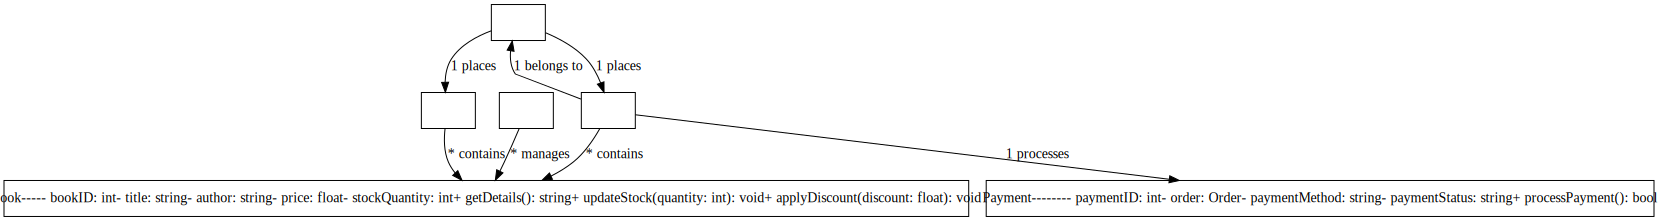

In [14]:
from graphviz import Digraph

# Create a Digraph object for the class diagram
dot = Digraph()

# Set graph attributes for a larger, more visible diagram, ideal for presentations
dot.attr(rankdir='TB', size='30,30')

# Define classes with their attributes and methods
classes = {
    "Customer": {
        "attributes": ["- customerID: int", "- name: string", "- email: string", "- password: string", "- address: string"],
        "methods": ["+ searchBook(bookTitle: string): list<Book>", "+ addToCart(book: Book, quantity: int): void", "+ placeOrder(): Order", "+ trackOrder(orderID: int): string"]
    },
    "Book": {
        "attributes": ["- bookID: int", "- title: string", "- author: string", "- price: float", "- stockQuantity: int"],
        "methods": ["+ getDetails(): string", "+ updateStock(quantity: int): void", "+ applyDiscount(discount: float): void"]
    },
    "Cart": {
        "attributes": ["- cartID: int", "- items: list<Book>", "- totalPrice: float"],
        "methods": ["+ addItem(book: Book, quantity: int): void", "+ removeItem(bookID: int): void", "+ calculateTotalPrice(): float"]
    },
    "Order": {
        "attributes": ["- orderID: int", "- orderDate: date", "- customer: Customer", "- items: list<Book>", "- totalAmount: float", "- status: string"],
        "methods": ["+ updateStatus(newStatus: string): void", "+ cancelOrder(): void", "+ trackOrder(): string"]
    },
    "Payment": {
        "attributes": ["- paymentID: int", "- order: Order", "- paymentMethod: string", "- paymentStatus: string"],
        "methods": ["+ processPayment(): bool"]
    },
    "StockManager": {
        "attributes": ["- stockManagerID: int", "- managedBooks: list<Book>"],
        "methods": ["+ checkStock(bookID: int): int", "+ updateStock(bookID: int, quantity: int): void"]
    }
}

# Add classes and their attributes/methods to the diagram
for class_name, details in classes.items():
    attributes = '\n'.join(details["attributes"])
    methods = '\n'.join(details["methods"])
    label = f"{class_name}\n{'-' * len(class_name)}\n{attributes}\n\n{methods}"
    dot.node(class_name, label=label, shape='record')

# Define relationships (associations, aggregation, composition)
dot.edge("Customer", "Cart", label="1 places")
dot.edge("Customer", "Order", label="1 places")
dot.edge("Cart", "Book", label="* contains")
dot.edge("Order", "Book", label="* contains")
dot.edge("Order", "Customer", label="1 belongs to")
dot.edge("Order", "Payment", label="1 processes")
dot.edge("StockManager", "Book", label="* manages")

# Render the diagram in-memory
dot


**Part 2: Discuss the benefits and limitations of using class diagrams as a modeling tool for developing the above system. Please include access modifiers.**

**Benefits of Using Class Diagrams for Modeling the Book Ordering System**

Clear Structure and Organization
-  Class diagrams offer a structured, visual representation of system components, relationships, and interactions. In this book ordering system, the class diagram helps to clearly define entities like Customer, Book, Cart, Order, Payment, and StockManager, making it easier for developers to understand and navigate.

Encapsulation and Access Control
-  Class diagrams can represent access modifiers (e.g., + for public, - for private), enforcing encapsulation. For instance, private attributes like - customerID or - email in the Customer class ensure that sensitive data is accessible only through designated public methods. This highlights security measures early in the design process.

Identifies Responsibilities and Methods
-  Defining class-specific methods clarifies each class's responsibilities. For example, Customer methods like searchBook() and addToCart() establish the functionalities expected from each class, helping developers adhere to principles like the Single Responsibility Principle (SRP).

Supports Scalability and Future Expansion
-  Class diagrams provide a flexible framework that can accommodate changes and additions, such as expanding with new classes for other system modules (e.g., adding Discount or Shipping classes). This scalability reduces the complexity of modifications during development.

Easy Collaboration and Communication
- For teams, class diagrams act as a common visual language that simplifies communication among developers, project managers, and stakeholders. They make system design more accessible, allowing non-technical team members to follow system requirements and discuss potential changes.

Facilitates Code Generation
-  Class diagrams can assist in auto-generating code structure. Many IDEs allow importing UML diagrams to create skeleton code, reducing the need for manual implementation and helping developers maintain consistency with the initial design.

**Limitations of Using Class Diagrams for Modeling the System**

Limited Dynamic Interaction Representation
- Class diagrams focus on static structure and do not effectively capture dynamic interactions or runtime behavior between objects. This limitation may hinder understanding complex interactions in real-time, such as order tracking and cart updates. Sequence diagrams or activity diagrams might be needed to represent such dynamic behaviors.

Potential Over-Simplification
- Class diagrams simplify relationships and interactions, which may lead to an oversimplified view of complex system dependencies. For example, this model does not account for potential failures in Payment processing, which might need additional handling not captured in a static class representation.

Not Ideal for Detailed Access Control
- While access modifiers (e.g., + for public, - for private) indicate basic encapsulation, class diagrams do not fully capture nuanced security details such as role-based access or permission levels, which may be required in a more complex ordering system involving administrators and customers with different access rights.

Difficulty in Handling Non-Class-Based Relationships
- Class diagrams are best suited for object-oriented systems and may struggle to represent non-object-oriented relationships or external dependencies, such as those with databases, external APIs, or web services.

May Not Reflect Performance Considerations
- Class diagrams focus on structural aspects and rarely account for performance or scalability implications, such as load balancing, caching strategies, or data handling for a high number of concurrent users. These considerations might need separate documentation or architectural diagrams to be accurately represented.

Scalability Challenges for Large Systems
- As the system grows in complexity, class diagrams may become overcrowded, making them difficult to read and manage. Detailed diagrams with many classes or complex relationships can reduce readability, defeating the purpose of visual simplicity in UML diagrams.